<a href="https://colab.research.google.com/github/sabrinabauche/Data-Science/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Revisión del algoritmo**

Dado un conjunto de datos X de dimensiones (10,2) implementaremos el algoritmo para determinar dos clusters, en donde los elementos tienen características similares

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from scipy.spatial import distance

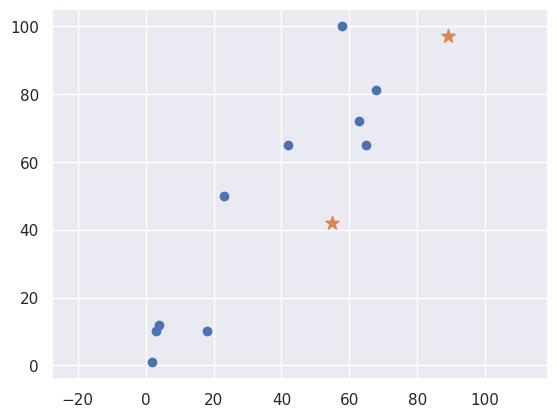

[55 42] [89 97]


In [ ]:
# X Conjunto de datos de entrada. Dos características y 10 datos
X = np.array([[2,1],[3,10],[4,12],[18,10],[23,50],[65,65],[68,81],[63,72],[42,65],[58,100]])

plt.axis('equal')
plt.scatter(X[:,0],X[:,1])

# Iniciamos los centroides teniendo en cuenta el valor mayor y menor
ck = np.random.randint(np.min(X),np.max(X), size=(2, 2))

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

[55 42] [89 97]
iteration:  0


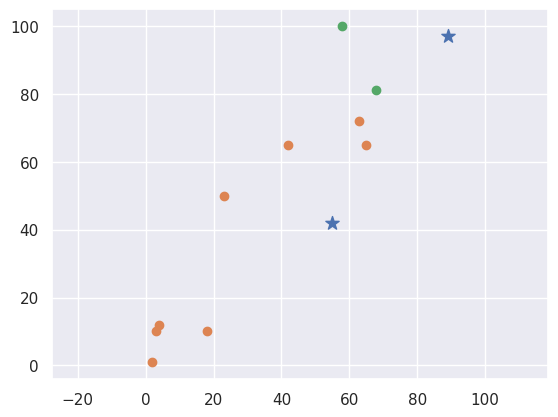

[27 35] [63 90]
iteration:  1


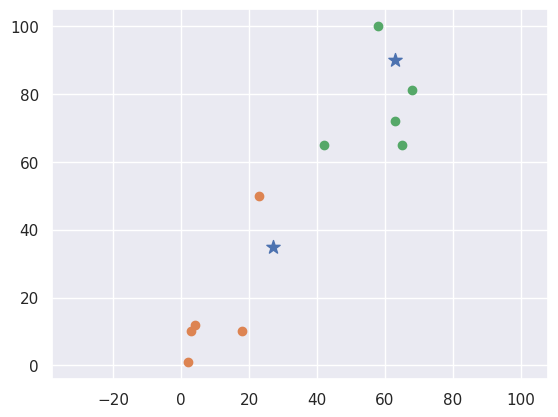

[10 16] [59 76]
iteration:  2


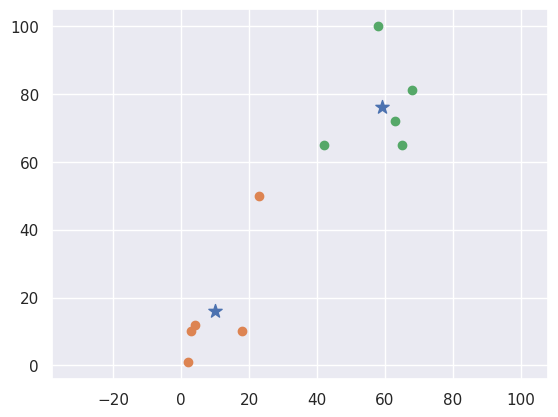

[10 16] [59 76]
iteration:  3


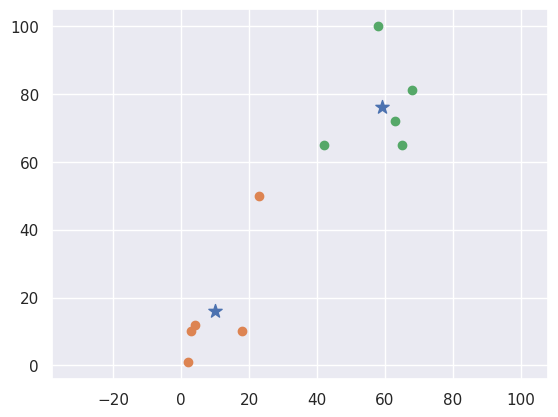

[10 16] [59 76]
iteration:  4


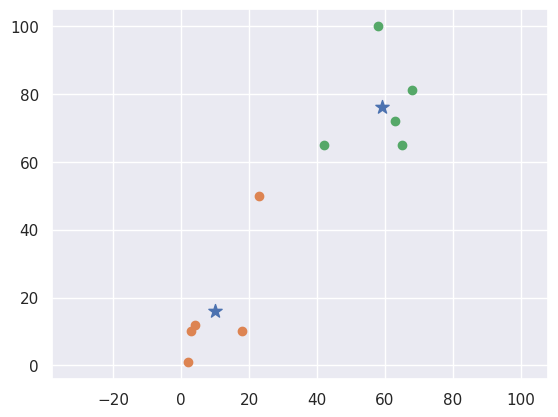

In [ ]:
# Calculamos las distancias de cada dato al centroide y reasignamos a los conjuntos C1 y C2.
# Este proceso ocurrirá 5 veces
for iteration in range(5):
  C1 = []
  C2 = []
  i=0
  print(ck[0,:],ck[1,:])

  # Recorremos cada dato en el conjunto de entrada para calcular la distancia eclidiana
  # De ese punto a cada centroide, en este caso son 2
  for x in X:
    dst1 = distance.euclidean(X[i,:], ck[0,:])
    dst2 = distance.euclidean(X[i,:], ck[1,:])

# Dependiendo de la distancia menor, se asignará al subconjunto C1 o C2
    if dst1 < dst2:
      C1.append(X[i,:])
    else:
      C2.append(X[i,:])
    i = i+1

  print('iteration: ', iteration)

  AC1=np.array(C1)
  AC2=np.array(C2)

  plt.axis('equal')
  plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')

  # Graficar los subconjuntos
  plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
  plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
  plt.show()

  # Actualizamos las coordenadas de los centroides
  ck[0,0] = np.mean(AC1[:,0])
  ck[0,1] = np.mean(AC1[:,1])

  ck[1,0] = np.mean(AC2[:,0])
  ck[1,1] = np.mean(AC2[:,1])

**2. Predicción**

El dato Xn pertenece al cluster:1 con centroide [10 16]


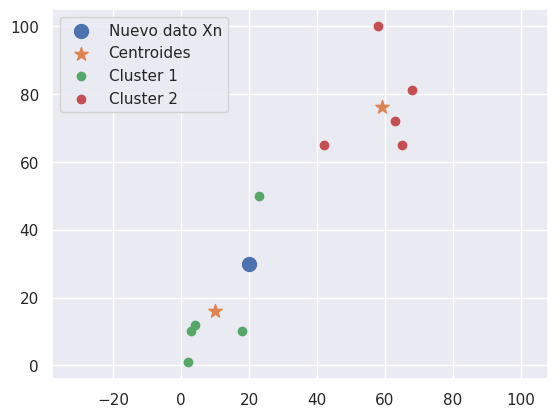

In [ ]:
# xn, nuevo dato
xn = (20,30)

# Distancia de xn a cada centroide
dst1 = distance.euclidean(xn, ck[0,:])
dst2 = distance.euclidean(xn, ck[1,:])

if dst1 < dst2:
    print('El dato Xn pertenece al cluster:{} con centroide {}'.format(1, ck[0,:]))
else:
    print('El dato Xn pertenece al cluster:{} con centroide {}'.format(2, ck[1,:]))

# Mostrar la gráfica SIEMPRE
plt.axis('equal')
plt.scatter(xn[0], xn[1], s=100, marker='o', label='Nuevo dato Xn')
plt.scatter(ck[:,0], ck[:,1], s=100, marker='*', label='Centroides')
plt.scatter(AC1[:,0], AC1[:,1], label='Cluster 1')
plt.scatter(AC2[:,0], AC2[:,1], label='Cluster 2')
plt.legend()
plt.show()


**3. Kmeans con Scikit Learn**

Usaremos el dataset de dígitos de Scikit Learn.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
digits = load_digits()
digits.data.shape
# Tiene 1797 datos con 64 elementos (dimensionalidad) imágenes de 8x8

(1797, 64)

In [ ]:
# Divide los datos en un conjunto de datos de entrenamiento y otro de prueba. 25% prueba y el resto entrenamiento.
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,random_state=0,stratify = digits.target)

In [ ]:
# 10 clusters números del 0 al 9 y pasa los datos de entrenamiento
kmeans = KMeans(n_clusters=10, random_state=0).fit(Xtrain)

In [ ]:
# Calcula los centroides
kmeans.cluster_centers_

array([[ 0.00000000e+00,  4.99600361e-16,  1.15942029e+00,
         1.11376812e+01,  9.75362319e+00,  1.36231884e+00,
         4.66293670e-15, -3.46944695e-16,  6.07153217e-18,
         5.79710145e-02,  7.11594203e+00,  1.46159420e+01,
         6.42753623e+00,  6.88405797e-01,  3.77475828e-15,
        -9.71445147e-17,  1.30104261e-18,  7.24637681e-01,
         1.24130435e+01,  9.60144928e+00,  1.03623188e+00,
         5.79710145e-02,  1.33226763e-15,  4.16333634e-17,
         0.00000000e+00,  2.30434783e+00,  1.37246377e+01,
         8.04347826e+00,  3.76086957e+00,  1.77536232e+00,
         1.01449275e-01,  1.30104261e-18,  0.00000000e+00,
         3.47826087e+00,  1.47971014e+01,  1.29130435e+01,
         1.23623188e+01,  1.02608696e+01,  2.69565217e+00,
         0.00000000e+00, -1.04083409e-17,  1.81884058e+00,
         1.44855072e+01,  1.06594203e+01,  5.45652174e+00,
         1.00869565e+01,  9.18115942e+00,  1.73913043e-01,
        -5.20417043e-18,  1.81159420e-01,  1.02898551e+0

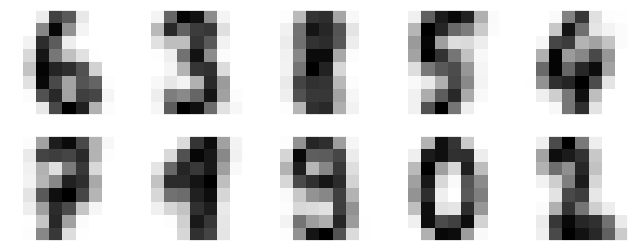

In [ ]:
# No estan ordenados justo porque no es aprendizaje supervisado, el modelo solo agrupa en base a caracteristicas
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
numbers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, number in zip(ax.flat, numbers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(number, interpolation='nearest', cmap=plt.cm.binary)

cluster 0
44 elementos


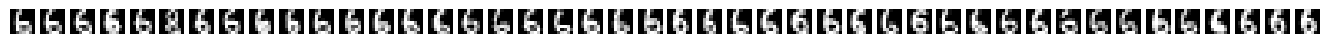

cluster 1
45 elementos


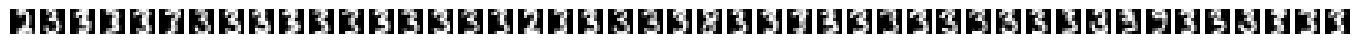

cluster 2
58 elementos


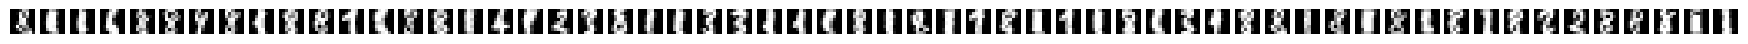

cluster 3
41 elementos


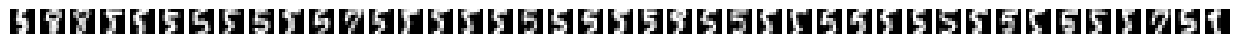

cluster 4
38 elementos


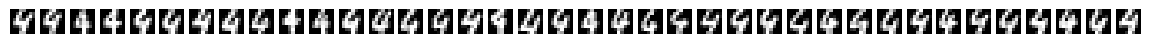

cluster 5
52 elementos


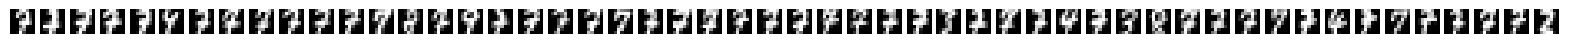

cluster 6
28 elementos


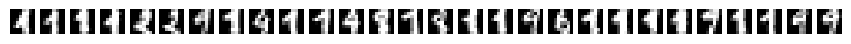

cluster 7
61 elementos


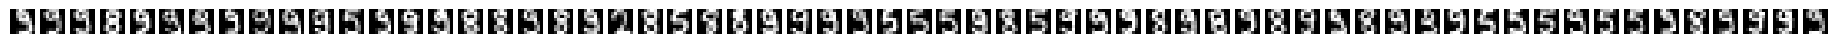

cluster 8
45 elementos


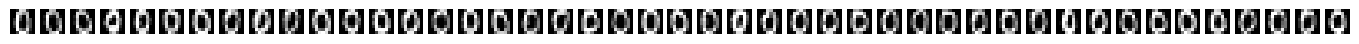

cluster 9
38 elementos


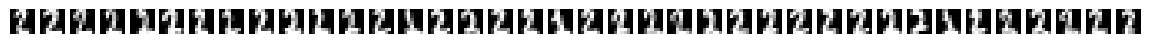

In [ ]:
# Una vez identificados los centroides, vamos a predecir a que cluster corresponde cada dato
ypred = kmeans.predict(Xtest)

for i in range(0, 10):
    row = np.where(ypred == i)[0]  # Filas que pertenecen al cluster i
    num = row.shape[0]             # Número de elementos del cluster
    r = int(np.floor(num / 65))    # Número de filas para el plot (entero)

    print("cluster " + str(i))
    print(str(num) + " elementos")

    plt.figure(figsize=(25, 5))
    for k in range(0, num):
        plt.subplot(r + 1, 65, k + 1)
        image = Xtest[row[k], ]
        image = image.reshape(8, 8)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

**4. IRIS**

Salida: Tiene 3 clases (especies de vegetales).3 clusters

Entrada: Caracteristicas de cada especie con dimensionalidad 4.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Cargamos dataset de iris
iris = datasets.load_iris()

# Imprimimos especies y características
print(iris.target_names)
print(iris.feature_names)

# Dividimos datos para entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target,random_state=5,stratify = iris.target)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Creamos dataframe para los datos de entrenamiento y pruebas
import pandas as pd
X_test=pd.DataFrame({
    'sepal length':Xtest[:,0],
    'sepal width':Xtest[:,1],
    'petal length':Xtest[:,2],
    'petal width':Xtest[:,3],
    'species': ytest
})
X_train=pd.DataFrame({
    'sepal length':Xtrain[:,0],
    'sepal width':Xtrain[:,1],
    'petal length':Xtrain[:,2],
    'petal width':Xtrain[:,3],
    'species': ytrain
})


X_train.head()

,sepal length,sepal width,petal length,petal width,species
0,6.5,3.0,5.8,2.2,2
1,6.3,2.5,5.0,1.9,2
2,6.1,2.9,4.7,1.4,1
3,7.9,3.8,6.4,2.0,2
4,5.8,2.7,3.9,1.2,1


In [ ]:
from sklearn.cluster import KMeans

# Se aplica el algoritmo y se encuentra los centroides de los grupos.
# No le pasamos la variable dependiente, en este caso species
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train.drop(["species"],axis = 1))

In [ ]:
kmeans.cluster_centers_

array([[4.99473684, 3.43421053, 1.46842105, 0.25526316],
       [5.9877551 , 2.75918367, 4.51020408, 1.46530612],
       [6.856     , 3.128     , 5.772     , 2.124     ]])

In [ ]:
import statistics as stat
import numpy as np

# Realizamos la predicción con los datos de prueba
y_pred = kmeans.predict(X_test.drop(["species"],axis = 1))

for i in range(0,3):

    row = np.where(y_pred==i)[0]  # Filas en y_pred que corresponden con el cluster i
    num = row.shape[0]       #  Elementos de cada cluster
    r = np.floor(num/10)    #  Numero de filas para las figuras en el plot

    print("cluster "+str(i))
    print(str(num)+" elementos")

    templist = []
    for k in range(0, num):
        templist.append(X_test.iloc[row[k], ].species)

    print('Clase asociada al cluster:',stat.mode(templist))

cluster 0
12 elementos
Clase asociada al cluster: 0.0
cluster 1
15 elementos
Clase asociada al cluster: 1.0
cluster 2
11 elementos
Clase asociada al cluster: 2.0


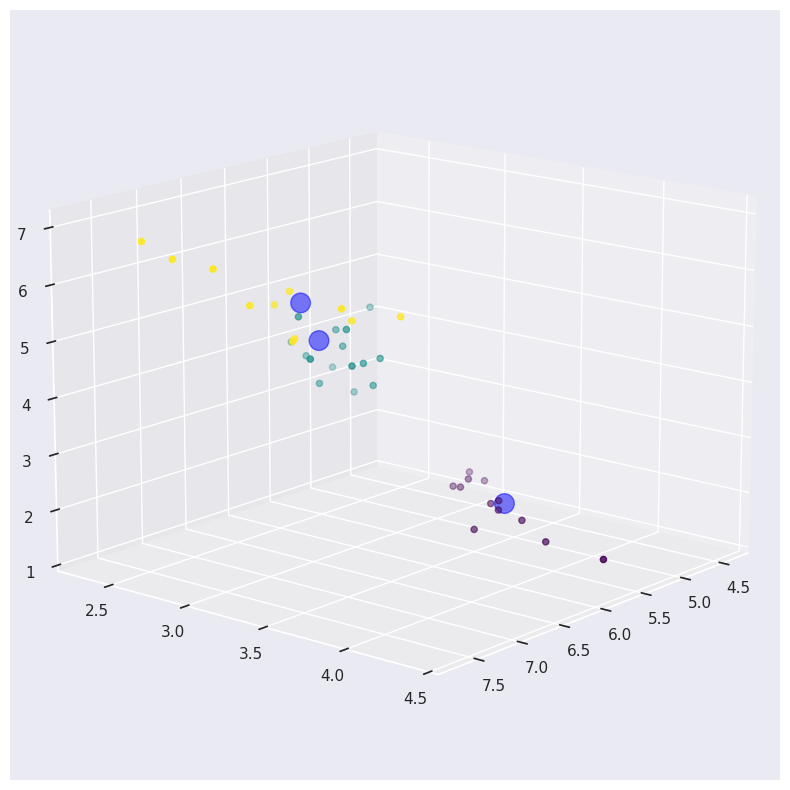

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(15, 40)

ax.scatter(X_test['sepal length'], X_test['sepal width'],X_test['petal length'],c=y_pred,cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],c ='blue',s=200,alpha = 0.5)

plt.show()

In [ ]:
y_pred

array([0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1], dtype=int32)

In [ ]:
ytest

array([0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1])

In [ ]:
# la matriz de confusion es una comparacion entre la prediccion y el resultado de las pruebas
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(ytest,y_pred)
print(matriz)

[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]
